In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(iris.data)

In [4]:
iris_data.columns = iris.feature_names

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
#applyting feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(iris_data)


In [7]:
x_scaled.shape

(150, 4)

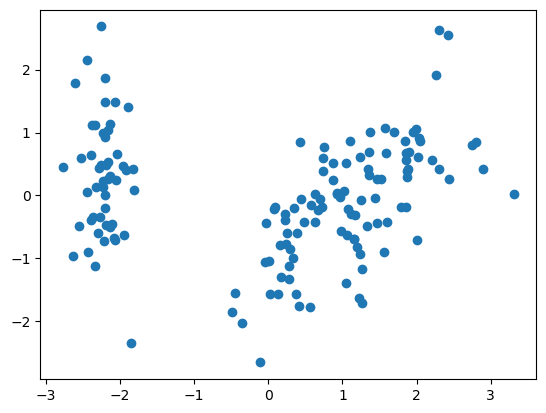

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_scaled = pca.fit_transform(x_scaled)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

In [35]:
pca

PCA(n_components=2)

Text(0, 0.5, 'Eucledian distance')

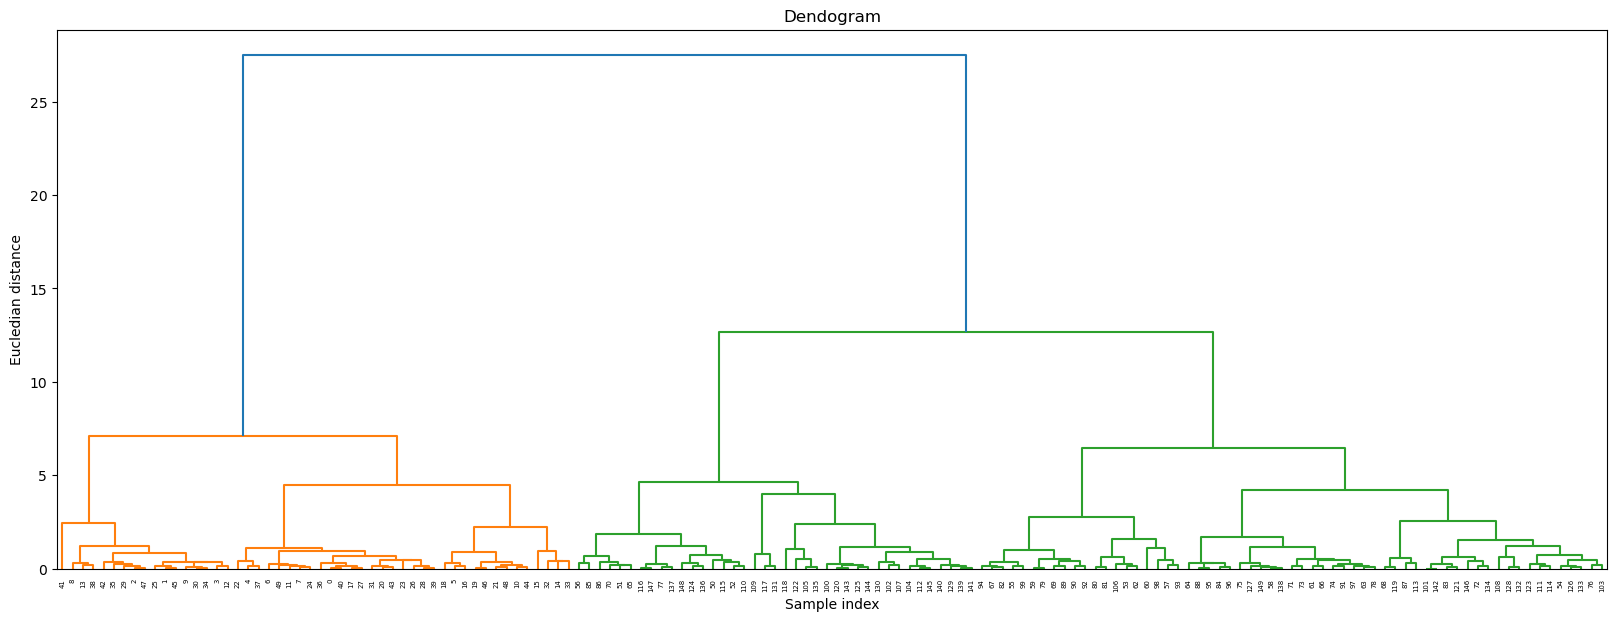

In [9]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendrogram")
sc.dendrogram(sc.linkage(pca_scaled, method = "ward"))
plt.title("Dendogram")
plt.xlabel("Sample index")
plt.ylabel("Eucledian distance")

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster.fit(pca_scaled)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [11]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

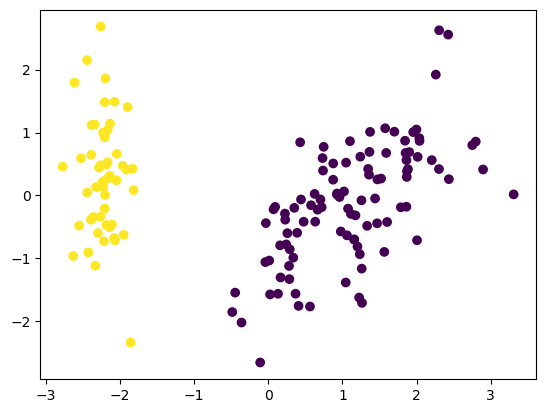

In [12]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1], c=cluster.labels_)